In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

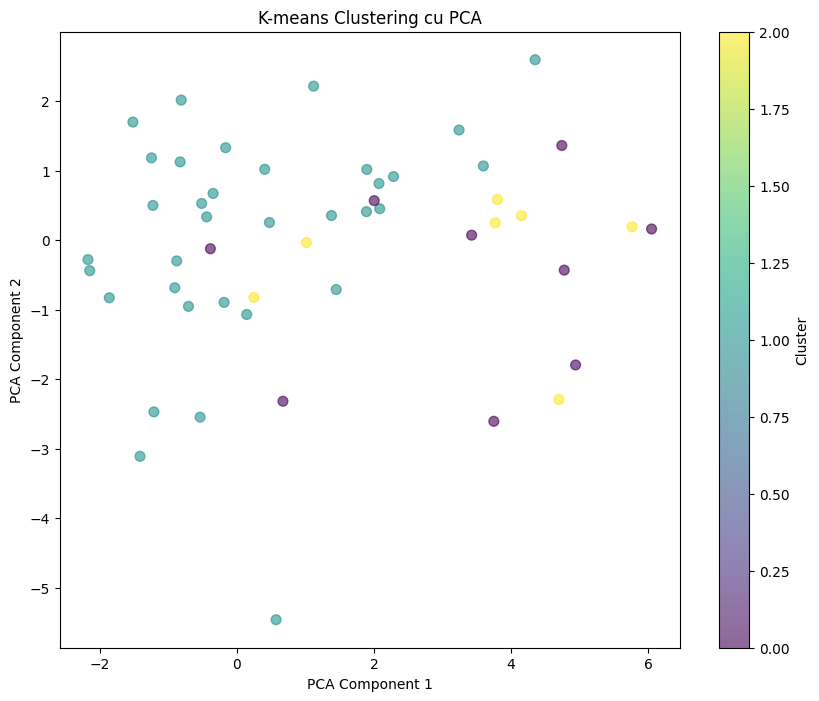

In [13]:
x = np.array([el[1:] for el in data.values])
kmeans = KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(x)

scaler=StandardScaler()
x=scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)



plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:50, 0], x_pca[:50, 1], c=clusters[:50], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering cu PCA")
plt.show()

array([0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 0, 2], dtype=int32)

In [7]:
x_pca.shape

(50, 2)